# Master Thesis

## Intro

Introduction

## Import Libraries

In [44]:
import time
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

import scikitplot as skplt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score, roc_auc_score, matthews_corrcoef, f1_score, confusion_matrix, classification_report, cohen_kappa_score

import pickle

## Timer starts

In [45]:
# start_time = time.time()

## Define Paths

In [46]:
path_data_credit_card = "/Users/greg/Downloads/AR_Master_Thesis/data/creditcard.csv"
path_HCC = "/Users/greg/Downloads/AR_Master_Thesis/data/HCC_preprocessed.csv"
path_ILPD = "/Users/greg/Downloads/AR_Master_Thesis/data/ILPD_preprocessed.csv"

## Import data

In [47]:
df = pd.read_csv(path_data_credit_card)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Inspect class balance

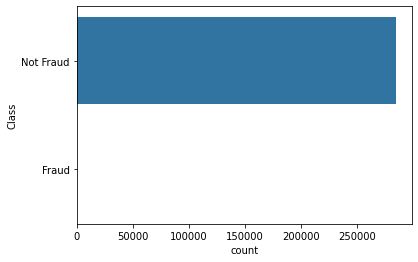

In [48]:
# visualize the target variable
g_ = sns.countplot(y=df.Class)
g_.set_yticklabels(['Not Fraud','Fraud'])
plt.show()

In [49]:
n = df.Class.value_counts()[0]
p = df.Class.value_counts()[1]

print(f'No. of Non-Fraud Cases: {n}')
print(f'No. of Fraud Cases: {p}')

# Ratio of fraud cases to all cases. 

print('No Frauds', round(n/len(df) * 100,2), '% of the dataset')
print('Frauds', round(p/len(df) * 100,2), '% of the dataset')

No. of Non-Fraud Cases: 284315
No. of Fraud Cases: 492
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [50]:
len(df)/5

56961.4

## Split data for validation

<img> <src="https://upload.wikimedia.org/wikipedia/commons/b/bb/ML_dataset_training_validation_test_sets.png" width ="500" height=500 >

In [51]:
n_splits = 5
test_size = 0.2
random_state = 6

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [57]:
df_train = X_train
df_train['Class'] = y_train

## Divide data into 5 different sites with equal number of data points. 

In [59]:
subsets = []

for i in range(5):
    df_sub = df_train.sample(frac=0.2, replace=False, random_state=i)
    subsets.append(df_sub)


In [60]:
for i in subsets: 
    n = i.Class.value_counts()[0]
    p = i.Class.value_counts()[1]
    print(p/(n+p))


0.001580021505848274
0.0016239109921218373
0.0017555794509425268
0.001689745221532182
0.0016678004783954004


In [65]:
#agg_estimators = []

subset_3 = subsets[2]

X_subset_3 = subset_3.drop('Class', axis=1)
y_subset_3 = subset_3['Class']

abc_3 = AdaBoostClassifier(n_estimators=100, random_state=6)
clf_3 = abc_3.fit(X_subset_3, y_subset_3)

In [67]:
type(clf_3.estimators_)

list

In [69]:
clf_3.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [68]:
agg_estimators = []
print(len(agg_estimators))

for s in subsets: 
    X_s = s.drop('Class', axis=1)
    y_s = s['Class']
    abc_s = AdaBoostClassifier(n_estimators=100, random_state=6)
    clf_s = abc_s.fit(X_s, y_s)
    agg_estimators.extend(clf_s.estimators_)
    print(len(agg_estimators))


0
100
200
300
400
500


Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold. 
<br>
<br>
Source: https://scikit-learn.org/stable/modules/cross_validation.html (3.1.1.2)
<br>
<br>
StratifiedShuffleSplit is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

In [27]:
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)

# Returns the number of splitting iterations in the cross-validator
# sss.get_n_splits(X, y)
sss_results = sss.split(X_train, y_train)

# Generate indices to split data into training and test set.
for train_index, validate_index in sss_results:
    print("TRAIN:", train_index, "TEST:", validate_index)
    X_train, X_validate = X.iloc[train_index], X.iloc[validate_index]
    y_train, y_validate = y.iloc[train_index], y.iloc[validate_index]

# Turn into an array
X_train = X_train.values
X_validate = X_validate.values
y_train = y_train.values
y_validate = y_validate.values

TRAIN: [ 38269 102003 111768 ...  46600  49414  33378] TEST: [166032  82439  61960 ... 209257 184431 176723]
TRAIN: [ 82830 188066  60942 ... 131136  74637  27911] TEST: [143771  79874 215530 ... 120378 189008 127716]
TRAIN: [133083  61806  28085 ...  50360 182385 193320] TEST: [ 43592  60325 110685 ... 179265 139898    504]
TRAIN: [ 93793  10153 194368 ...  44501 205041  69138] TEST: [ 54541 144049 119916 ... 145682 141331 183008]
TRAIN: [145446 227432 218041 ... 127252 187173 159981] TEST: [182957 169605 195652 ... 147650  49174 117146]


<AxesSubplot:title={'center':'StratifiedShuffleSplit'}, xlabel='Sample index', ylabel='CV iteration'>

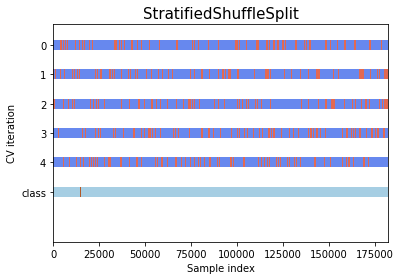

In [28]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class']
    ax.set(yticks=np.arange(n_splits+1) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, len(X)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

fig, ax = plt.subplots()
cv = StratifiedShuffleSplit(n_splits, test_size=test_size, random_state=random_state)
plot_cv_indices(cv, X_train, y_train, ax, n_splits)

## AdaBoost

In [35]:
abc_central_500 = AdaBoostClassifier(n_estimators=500, random_state=6)
clf_500 = abc_central_500.fit(X_train, y_train)


In [37]:
y_pred_500 = clf_500.predict(X_validate)
y_prob_500 = clf_500.predict_proba(X_validate)[:, 1]

# calculate and print model evaluation metrics
print("AdaBoost Classifier Model F-1 Score:", f1_score(y_validate, y_pred_500, average=None))
print("AdaBoost Classifier Model MCC Score:", matthews_corrcoef(y_validate, y_pred_500))
print("AdaBoost Classifier Model AUC Score:", roc_auc_score(y_validate, y_prob_500, average=None))
print("AdaBoost Classifier Model ACC Score:", balanced_accuracy_score(y_validate, y_pred_500))

AdaBoost Classifier Model F-1 Score: [0.99963727 0.79503106]
AdaBoost Classifier Model MCC Score: 0.8002852888658288
AdaBoost Classifier Model AUC Score: 0.9435119017079924
AdaBoost Classifier Model ACC Score: 0.8554785969592804


In [38]:
y_pred_t_500 = clf_500.predict(X_test)
y_prob_t_500 = clf_500.predict_proba(X_test)[:, 1]

# calculate and print model evaluation metrics
print("AdaBoost Classifier Model F-1 Score:", f1_score(y_test, y_pred_t_500, average=None))
print("AdaBoost Classifier Model MCC Score:", matthews_corrcoef(y_test, y_pred_t_500))
print("AdaBoost Classifier Model AUC Score:", roc_auc_score(y_test, y_prob_t_500, average=None))
print("AdaBoost Classifier Model ACC Score:", balanced_accuracy_score(y_test, y_pred_t_500))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


AdaBoost Classifier Model F-1 Score: [0.99985933 0.91304348]
AdaBoost Classifier Model MCC Score: 0.9148573506231311
AdaBoost Classifier Model AUC Score: 0.9877394542510307
AdaBoost Classifier Model ACC Score: 0.9285538427526328


In [36]:
abc_central_700 = AdaBoostClassifier(n_estimators=700, random_state=6)
clf_700 = abc_central_700.fit(X_train, y_train)


In [40]:
y_pred_700 = clf_700.predict(X_validate)
y_prob_700 = clf_700.predict_proba(X_validate)[:, 1]

# calculate and print model evaluation metrics
print("AdaBoost Classifier Model F-1 Score:", f1_score(y_validate, y_pred_700, average=None))
print("AdaBoost Classifier Model MCC Score:", matthews_corrcoef(y_validate, y_pred_700))
print("AdaBoost Classifier Model AUC Score:", roc_auc_score(y_validate, y_prob_700, average=None))
print("AdaBoost Classifier Model ACC Score:", balanced_accuracy_score(y_validate, y_pred_700))

AdaBoost Classifier Model F-1 Score: [0.99962628 0.79012346]
AdaBoost Classifier Model MCC Score: 0.7946924748813938
AdaBoost Classifier Model AUC Score: 0.9453462037423865
AdaBoost Classifier Model ACC Score: 0.8554676028740982


In [41]:
y_pred_t_700 = clf_700.predict(X_test)
y_prob_t_700 = clf_700.predict_proba(X_test)[:, 1]

# calculate and print model evaluation metrics
print("AdaBoost Classifier Model F-1 Score:", f1_score(y_test, y_pred_t_700, average=None))
print("AdaBoost Classifier Model MCC Score:", matthews_corrcoef(y_test, y_pred_t_700))
print("AdaBoost Classifier Model AUC Score:", roc_auc_score(y_test, y_prob_t_700, average=None))
print("AdaBoost Classifier Model ACC Score:", balanced_accuracy_score(y_test, y_pred_t_700))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


AdaBoost Classifier Model F-1 Score: [0.99985933 0.91397849]
AdaBoost Classifier Model MCC Score: 0.9151661554456142
AdaBoost Classifier Model AUC Score: 0.9870740642908824
AdaBoost Classifier Model ACC Score: 0.9336470906595615


In [10]:
abc = AdaBoostClassifier(random_state=7)
pipe = Pipeline(
    steps=[
        ('abc', abc)
        ]
    )

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'abc__n_estimators': [100, 200, 500]
}

# Scoring options: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# scoring = ['balanced_accuracy', 'roc_auc', 'matthews_corrcoef', 'f1']

scoring = {
    'acc': 'balanced_accuracy',
    'roc_auc': 'roc_auc', 
    'mcc': make_scorer(matthews_corrcoef), 
    'f1': 'f1'
    }

search = GridSearchCV(pipe, param_grid, cv=sss, scoring='f1', n_jobs=-1)
search.fit(X, y)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.800):
{'abc__n_estimators': 500}


In [11]:
search.best_estimator_

Pipeline(steps=[('abc', AdaBoostClassifier(n_estimators=500, random_state=7))])

In [12]:
search.best_score_

0.8002061996971319

In [13]:
search.cv_results_

{'mean_fit_time': array([169.10331841, 322.46918082, 799.90453906]),
 'std_fit_time': array([  3.94061252,   7.54174997, 108.54514598]),
 'mean_score_time': array([1.227425  , 2.13430476, 4.47422462]),
 'std_score_time': array([0.10869613, 0.0778125 , 0.86218942]),
 'param_abc__n_estimators': masked_array(data=[100, 200, 500],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'abc__n_estimators': 100},
  {'abc__n_estimators': 200},
  {'abc__n_estimators': 500}],
 'split0_test_score': array([0.76243094, 0.76502732, 0.80645161]),
 'split1_test_score': array([0.79144385, 0.80662983, 0.82162162]),
 'split2_test_score': array([0.7816092 , 0.79768786, 0.80681818]),
 'split3_test_score': array([0.76842105, 0.79792746, 0.78453039]),
 'split4_test_score': array([0.71428571, 0.73619632, 0.7816092 ]),
 'mean_test_score': array([0.76363815, 0.78069376, 0.8002062 ]),
 'std_test_score': array([0.02666875, 0.02639674, 0.01505273]),
 'rank_test_

In [14]:
search.scoring

'f1'

In [18]:
param_grid_2 = {
    'abc__n_estimators': [500, 1000, 2000]
}

search_2 = GridSearchCV(pipe, param_grid_2, cv=sss, scoring='f1', n_jobs=-1)
search_2.fit(X, y)

print("Best parameter (CV score=%0.3f):" % search_2.best_score_)
print(search_2.best_params_)

Best parameter (CV score=0.800):
{'abc__n_estimators': 500}


In [20]:
param_grid_3 = {
    'abc__n_estimators': [400, 500, 600]
}

search_3 = GridSearchCV(pipe, param_grid_3, cv=sss, scoring='f1', n_jobs=-1)
search_3.fit(X, y)

print("Best parameter (CV score=%0.3f):" % search_3.best_score_)
print(search_3.best_params_)

Best parameter (CV score=0.805):
{'abc__n_estimators': 600}


In [21]:
param_grid_4 = {
    'abc__n_estimators': [700, 800]
}

search_4 = GridSearchCV(pipe, param_grid_4, cv=sss, scoring='f1', n_jobs=-1)
search_4.fit(X, y)

print("Best parameter (CV score=%0.3f):" % search_4.best_score_)
print(search_4.best_params_)

Best parameter (CV score=0.808):
{'abc__n_estimators': 700}
